In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import time
import math
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


# CLEANING DATA FROM MERGED DATASETS


# LOADING MERGE_DF

In [2]:
import pandas as pd
merge_df = pd.read_csv('../raw_data/merge_df.csv')
merge_df.head()

/tmp/ipykernel_612796/47615108.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  merge_df = pd.read_csv('../raw_data/merge_df.csv')


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


# DETECT MISSING VALUES 


In [3]:
missing_values = merge_df.isnull().sum()
print(missing_values)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
weekday              0
wday                 0
month                0
year                 0
event_name_1    351800
event_type_1    351800
event_name_2    381800
event_type_2    381800
snap_CA              0
snap_TX              0
snap_WI              0
sell_price       73808
dtype: int64


In [4]:
#FILLING THE EMPTY PLACES
merge_df['sell_price'].fillna(0, inplace=True)
merge_df['event_name_1'].fillna('missing', inplace=True)
merge_df['event_type_1'].fillna('missing', inplace=True)
merge_df['event_name_2'].fillna('missing', inplace=True)
merge_df['event_type_2'].fillna('missing', inplace=True)


/tmp/ipykernel_612796/1627116259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df['sell_price'].fillna(0, inplace=True)
/tmp/ipykernel_612796/1627116259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [5]:
#CHECKING MISSING VALUES AGAIN
missing_values = merge_df.isnull().sum()
print(missing_values)

id              0
item_id         0
dept_id         0
cat_id          0
store_id        0
state_id        0
d               0
sales           0
date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
sell_price      0
dtype: int64


### CHECKING DUPLICATED ROWS 

In [6]:

duplicated_rows = merge_df[merge_df.duplicated()]

print("Duplicated rows:")
print(duplicated_rows)


Duplicated rows:
Empty DataFrame
Columns: [id, item_id, dept_id, cat_id, store_id, state_id, d, sales, date, wm_yr_wk, weekday, wday, month, year, event_name_1, event_type_1, event_name_2, event_type_2, snap_CA, snap_TX, snap_WI, sell_price]
Index: []

[0 rows x 22 columns]


In [7]:
#NO DUPLICATED ROWS

# MISSING DATES

In [8]:

star_date = '2011-01-29'
end_date = '2016-06-19'

# Generate the dates
expected_dates = pd.date_range(start=star_date, end=end_date)

# format
merge_df['date'] = pd.to_datetime(merge_df['date'])

# extract unique dates
current_dates = merge_df['date'].dt.date.unique()

expected_dates_set = set(expected_dates)
current_dates_set = set(current_dates)

# verify
missing_dates = expected_dates_set - current_dates_set

if not missing_dates:
    print("No missing dates .")
else:
    print("there is no these dates")
    print(missing_dates)

there is no these dates
{Timestamp('2016-03-25 00:00:00'), Timestamp('2012-06-28 00:00:00'), Timestamp('2012-12-02 00:00:00'), Timestamp('2014-10-09 00:00:00'), Timestamp('2013-03-27 00:00:00'), Timestamp('2011-03-13 00:00:00'), Timestamp('2016-06-02 00:00:00'), Timestamp('2012-06-09 00:00:00'), Timestamp('2012-06-14 00:00:00'), Timestamp('2014-09-11 00:00:00'), Timestamp('2014-08-10 00:00:00'), Timestamp('2016-02-06 00:00:00'), Timestamp('2016-04-24 00:00:00'), Timestamp('2013-02-06 00:00:00'), Timestamp('2015-12-21 00:00:00'), Timestamp('2015-12-26 00:00:00'), Timestamp('2014-03-09 00:00:00'), Timestamp('2011-05-02 00:00:00'), Timestamp('2013-05-26 00:00:00'), Timestamp('2011-08-18 00:00:00'), Timestamp('2013-07-14 00:00:00'), Timestamp('2015-04-23 00:00:00'), Timestamp('2011-12-25 00:00:00'), Timestamp('2013-07-23 00:00:00'), Timestamp('2013-08-30 00:00:00'), Timestamp('2016-05-09 00:00:00'), Timestamp('2012-08-17 00:00:00'), Timestamp('2014-04-23 00:00:00'), Timestamp('2013-08-25 0

## FILLING THE MISSING DATES

In [9]:
import pandas as pd

# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Define the date range from January 29, 2011 to April 24, 2016
start_date = '2011-01-29'
end_date = '2016-04-24'

# Generate all dates within the range
expected_dates = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all expected dates
expected_dates_df = pd.DataFrame({'date': expected_dates})

# Merge the expected dates DataFrame with the existing DataFrame
merge_df = pd.merge(expected_dates_df, merge_df, on='date', how='left')

# Check if there are any missing dates in the range
if merge_df['date'].isnull().any():
    print("There are still missing dates in the specified range.")
else:
    print("All missing dates have been filled correctly.")


All missing dates have been filled correctly.


In [10]:
merge_df.head(5)

,date,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
1,2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2,2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
3,2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
4,2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,...,1,2011,missing,missing,missing,missing,0,0,0,0.0


### SET AS INDEX 

In [11]:
# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Set the 'date' column as the DataFrame index without renaming it to 'index'
merge_df.set_index('date', inplace=True, drop=True)

# Check the index name
print("Index name:", merge_df.index.name)

Index name: date


In [12]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0


In [13]:
#dropping month and year because repetitive
# merge_df.drop(columns=['year','month'], inplace=True)


In [14]:
merge_df.to_csv('../raw_data/cleaned_merge_df.csv', index=False)

In [15]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,2011,missing,missing,missing,missing,0,0,0,0.0


## testing product

In [16]:
test_product = merge_df[merge_df['item_id']=='HOBBIES_1_272'].groupby('date').sum()

<Axes: >

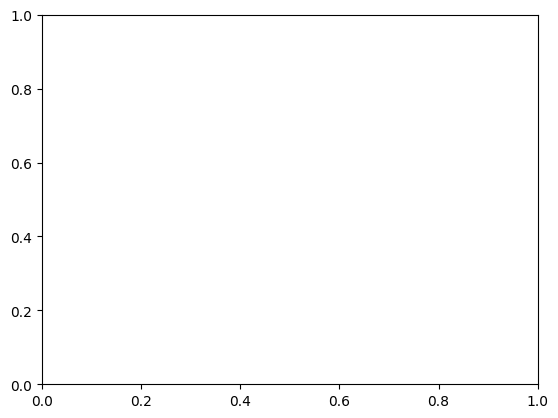

In [17]:
sns.lineplot(test_product['sales'])

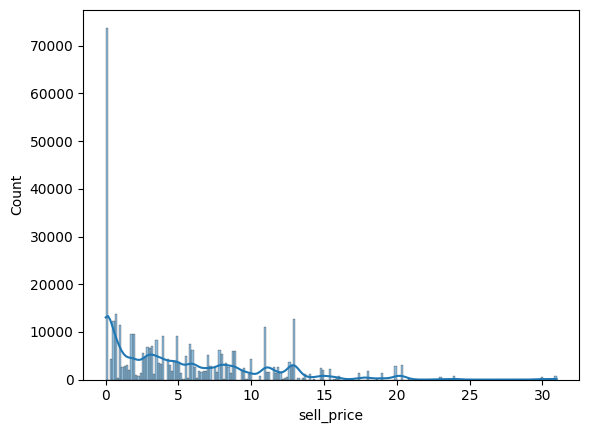

In [18]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

# MinMax Scaler & OneHotEncoder

In [19]:
# Scale 'sell_price' and 'year' by using MinMaxScaler
minmax_scaler = MinMaxScaler()

merge_df[['sell_price']] = minmax_scaler.fit_transform(merge_df[['sell_price']])
merge_df[['year']] = minmax_scaler.fit_transform(merge_df[['year']])

In [20]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0


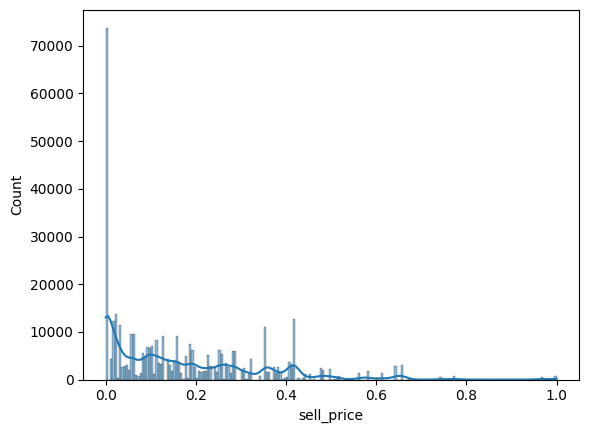

In [21]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

In [22]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,weekday,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,Saturday,...,1,0.0,missing,missing,missing,missing,0,0,0,0.0


In [23]:
# Check unique values
print(f"The unique values for 'cat_id' are {merge_df['cat_id'].unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(merge_df[['cat_id']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['cat_id']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['cat_id'], inplace = True)

The unique values for 'cat_id' are ['HOBBIES']
The categories detected by the OneHotEncoder are [array(['HOBBIES'], dtype=object)]
The column names for the encoded values are ['cat_id_HOBBIES']


In [24]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,cat_id_HOBBIES
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,missing,missing,missing,missing,0,0,0,0.0,1.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,missing,missing,missing,missing,0,0,0,0.0,1.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,missing,missing,missing,missing,0,0,0,0.0,1.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,missing,missing,missing,missing,0,0,0,0.0,1.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,missing,missing,missing,missing,0,0,0,0.0,1.0


In [25]:
# Check unique values
print(f"The unique values for 'event_type_1' are {merge_df['event_type_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_1'], inplace = True)

The unique values for 'event_type_1' are ['missing' 'Sporting' 'Cultural' 'National' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'National', 'Religious', 'Sporting', 'missing'],
      dtype=object)]
The column names for the encoded values are ['event_type_1_Cultural' 'event_type_1_National' 'event_type_1_Religious'
 'event_type_1_Sporting' 'event_type_1_missing']


In [26]:
# Check unique values
print(f"The unique values for 'event_type_2' are {merge_df['event_type_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_2'], inplace = True)

The unique values for 'event_type_2' are ['missing' 'Cultural' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'Religious', 'missing'], dtype=object)]
The column names for the encoded values are ['event_type_2_Cultural' 'event_type_2_Religious' 'event_type_2_missing']


In [27]:
# Check unique values
print(f"The unique values for 'event_name_1' are {merge_df['event_name_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_1'], inplace = True)

The unique values for 'event_name_1' are ['missing' 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart'
 'LentWeek2' 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End'
 'Cinco De Mayo' "Mother's day" 'MemorialDay' 'NBAFinalsStart'
 'NBAFinalsEnd' "Father's day" 'IndependenceDay' 'Ramadan starts'
 'Eid al-Fitr' 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha'
 'VeteransDay' 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear'
 'OrthodoxChristmas' 'MartinLutherKingDay' 'Easter']
The categories detected by the OneHotEncoder are [array(['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay',
       'Easter', 'Eid al-Fitr', 'EidAlAdha', "Father's day", 'Halloween',
       'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', "Mother's day",
       'NBAFinalsEnd', 'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas',
       'OrthodoxEaster', 'Pesach End', 'PresidentsDay', 'Purim End',
       'Ramadan starts', 'StPatricksDay', 'SuperB

In [28]:
# Check unique values
print(f"The unique values for 'event_name_2' are {merge_df['event_name_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_2'], inplace = True)

The unique values for 'event_name_2' are ['missing' 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
The categories detected by the OneHotEncoder are [array(['Cinco De Mayo', 'Easter', "Father's day", 'OrthodoxEaster',
       'missing'], dtype=object)]
The column names for the encoded values are ['event_name_2_Cinco De Mayo' 'event_name_2_Easter'
 "event_name_2_Father's day" 'event_name_2_OrthodoxEaster'
 'event_name_2_missing']


In [29]:
merge_df.head()


,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
merge_df['wday'].value_counts()

wday
1    54800
2    54800
3    54600
4    54600
5    54600
6    54600
7    54600
Name: count, dtype: int64

In [31]:
merge_df['weekday'].value_counts()

weekday
Saturday     54800
Sunday       54800
Monday       54600
Tuesday      54600
Wednesday    54600
Thursday     54600
Friday       54600
Name: count, dtype: int64

In [32]:
#Encoding Cyclical Features for weekdays
# Notice that Sat starts as 1 till Fri as 7 for 'wday'
merge_df['wday_sin'] = np.sin(2 * np.pi * merge_df['wday'] /7.0)
merge_df['wday_cos'] = np.cos(2 * np.pi * merge_df['wday'] /7.0)

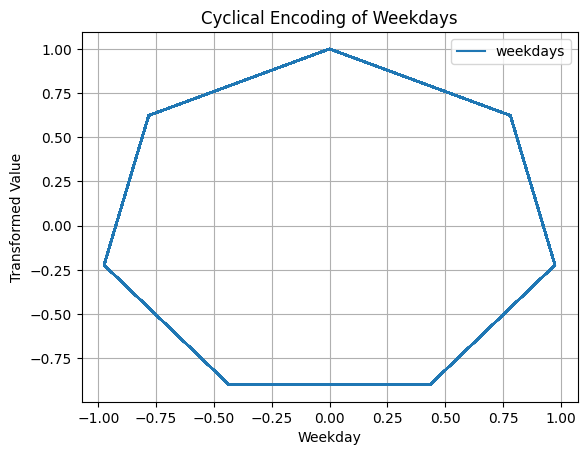

In [33]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['wday_sin'], merge_df['wday_cos'], label='weekdays')
plt.title('Cyclical Encoding of Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#Encoding Cyclical Features for month

merge_df['month_sin'] = np.sin(2 * np.pi * merge_df['month'] /12.0)
merge_df['month_cos'] = np.cos(2 * np.pi * merge_df['month'] /12.0)

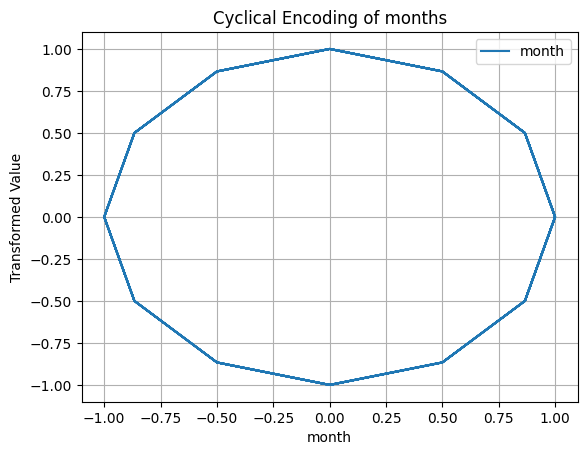

In [35]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['month_sin'], merge_df['month_cos'], label='month')
plt.title('Cyclical Encoding of months')
plt.xlabel('month')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,d,sales,wm_yr_wk,weekday,wday,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,d_1,0,11101,Saturday,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025


In [37]:
merge_df_scaled = pd.read_csv("../raw_data/merge_df_scaled.csv")

In [38]:
merge_df_scaled

,date,id,item_id,dept_id,store_id,state_id,sales,wday,month,year,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
0,2011-01-29,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,CA_1,CA,12,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
1,2011-01-29,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,CA_1,CA,4,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2,2011-01-29,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,CA_1,CA,5,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
3,2011-01-29,HOBBIES_1_019_CA_1_validation,HOBBIES_1_019,HOBBIES_1,CA_1,CA,0,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
4,2011-01-29,HOBBIES_1_032_CA_1_validation,HOBBIES_1_032,HOBBIES_1,CA_1,CA,9,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382595,2016-04-24,FOODS_1_046_CA_2_validation,FOODS_1_046,FOODS_1,CA_2,CA,8,2,4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
382596,2016-04-24,FOODS_1_055_CA_2_validation,FOODS_1_055,FOODS_1,CA_2,CA,4,2,4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
382597,2016-04-24,FOODS_1_067_CA_2_validation,FOODS_1_067,FOODS_1,CA_2,CA,15,2,4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
382598,2016-04-24,FOODS_1_085_CA_2_validation,FOODS_1_085,FOODS_1,CA_2,CA,12,2,4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000


# ARIMA with MAE

In [39]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings


In [40]:
cleaned_merge_df_top10 = pd.read_csv('../raw_data/cleaned_merge_df_top10.csv')
cleaned_merge_df_top10.head()

,date,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,FOODS_2_197_CA_1_validation,FOODS_2_197,FOODS_2,FOODS,CA_1,CA,38,Saturday,1,0,0,0,0,0,0,0,2.98
1,2011-01-29,FOODS_3_080_CA_1_validation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,33,Saturday,1,0,0,0,0,0,0,0,1.48
2,2011-01-29,FOODS_3_090_CA_1_validation,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,107,Saturday,1,0,0,0,0,0,0,0,1.25
3,2011-01-29,FOODS_3_120_CA_1_validation,FOODS_3_120,FOODS_3,FOODS,CA_1,CA,0,Saturday,1,0,0,0,0,0,0,0,0.00
4,2011-01-29,FOODS_3_252_CA_1_validation,FOODS_3_252,FOODS_3,FOODS,CA_1,CA,19,Saturday,1,0,0,0,0,0,0,0,1.48


In [43]:
# Assuming 'target' is the column you are predicting
X = cleaned_merge_df_top10.index  # the datetime index will be used to plot if needed
y = cleaned_merge_df_top10['sales']

# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through cross-validation splits
results = []  # to store each fold's MAE

for train_index, test_index in tscv.split(y):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit ARIMA model on the training data
    # For ARIMA, p=1, d=1, q=1 are common starting parameters. Adjust as necessary.
    model = ARIMA(y_train, order=(1, 1, 1))
    model_fit = model.fit()

    # Predict on the test data
    predictions = model_fit.forecast(steps=len(y_test))

    # Calculate and store the error metric
    mae = mean_absolute_error(y_test, predictions)
    results.append(mae)
    print(f'Mean Absolute Error for the current fold: {mae}')

# Optionally, print the average MAE across all folds
print(f'Average Mean Absolute Error across all folds: {np.mean(results)}')

# Handle possible convergence warnings
warnings.filterwarnings("ignore")

Mean Absolute Error for the current fold: 21.172831542704863
Mean Absolute Error for the current fold: 23.529548471248365
Mean Absolute Error for the current fold: 32.69864631773933
Mean Absolute Error for the current fold: 21.252050539380296
Mean Absolute Error for the current fold: 15.723058373265733
Average Mean Absolute Error across all folds: 22.875227048867718


# Auto_ARIMA with MAE

In [ ]:
# from pmdarima import auto_arima

# # Dictionary to store MAE results for each unique time-series identified by id
# product_results = {}

# # Iterate over each unique product series identified by id
# for id in merge_df_scaled['id'].unique()[:10]:
#     print(f"Analyzing product: {id}")
#     product_data = merge_df_scaled[merge_df_scaled['id'] == id]

#     # Assuming 'sales' is the column you are predicting
#     data_train = product_data.iloc[:-28]
#     data_test = product_data.iloc[-28:]
#     X_train = data_train.drop(columns="sales")
#     y_train = data_train["sales"]
#     X_test = data_test.drop(columns="sales")
#     y_test = data_test["sales"]

#     # Results list for the current product time-series
#     results = []

#     # Fit ARIMA model on the training data using auto_arima to find the best (p, d, q)
#     model = auto_arima(y_train, start_p=0, start_q=0, max_p=5, max_q=5, d=1,
#                        seasonal=True, trace=False, error_action='ignore', 
#                        suppress_warnings=True, stepwise=True)

#     # Predict on the test data
#     predictions = model.predict(n_periods=len(y_test))

#     # Calculate and store the error metric for the current fold
#     mae = mean_absolute_error(y_test, predictions)
#     results.append(mae)

#     # Store the average MAE for the current product time-series
#     product_results[id] = np.mean(results)
#     print(f'Mean Absolute Error for {id}: {product_results[id]}')

# # Optionally, you could print or analyze the average MAE across all products
# average_mae_across_products = np.mean(list(product_results.values()))
# print(f'Average Mean Absolute Error across all products: {average_mae_across_products}')

# # Handle possible convergence warnings
# warnings.filterwarnings("ignore")

In [ ]:
#WE USING SARIMAX BECAUSE THERE IS A SEASONAL  TRENDS , SATURDAY AND SUNDAY SEE MUCH HIGHER VOLUMENS
STORE_LEVEL_FINAL=STORE_LEVELT.MERGE(CALENDAR,ON='d?)

# SARIMAX


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'target' is the column you are predicting
X = cleaned_merge_df_top10.index  # the datetime index will be used to plot if needed
y = cleaned_merge_df_top10['sales']

# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through cross-validation splits
results_mae = []  # to store each fold's MAE
results_rmse = []  # to store each fold's RMSE

for train_index, test_index in tscv.split(y):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit SARIMAX model on the training data
    # For SARIMAX, you need to specify the seasonal_order and potentially exogenous variables
    model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Adjust as necessary
    model_fit = model.fit()

    # Predict on the test data
    predictions = model_fit.forecast(steps=len(y_test))

    # Calculate and store the error metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results_mae.append(mae)
    results_rmse.append(rmse)
    
    print(f'Mean Absolute Error for the current fold: {mae}')
    print(f'Root Mean Squared Error for the current fold: {rmse}')

# Optionally, print the average MAE and RMSE across all folds
print(f'Average Mean Absolute Error across all folds: {np.mean(results_mae)}')
print(f'Average Root Mean Squared Error across all folds: {np.mean(results_rmse)}')

# Handle possible convergence warnings
warnings.filterwarnings("ignore")


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20473D+00    |proj g|=  8.12473D-02

At iterate    5    f=  5.06101D+00    |proj g|=  5.44626D-02

At iterate   10    f=  4.98501D+00    |proj g|=  1.51518D-02

At iterate   15    f=  4.75426D+00    |proj g|=  6.79875D-02

At iterate   20    f=  4.75161D+00    |proj g|=  7.26662D-04

At iterate   25    f=  4.75010D+00    |proj g|=  1.31097D-02

At iterate   30    f=  4.74867D+00    |proj g|=  1.45366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.02531D+00    |proj g|=  1.43625D-02

At iterate   10    f=  4.88238D+00    |proj g|=  1.06330D-01

At iterate   15    f=  4.78863D+00    |proj g|=  1.83391D-03

At iterate   20    f=  4.78862D+00    |proj g|=  5.95541D-04

At iterate   25    f=  4.78759D+00    |proj g|=  3.71305D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     46      1     0     0   3.713D-02   4.788D+00
  F =   4.7875899560329209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Mean Absolute Error for the current fold: 26.697472211943833
Root Mean Squared Error for the current fold: 37.019

 This problem is unconstrained.



At iterate    5    f=  5.09296D+00    |proj g|=  1.19121D-02

At iterate   10    f=  4.93796D+00    |proj g|=  2.49301D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     31      1     0     0   1.240D-02   4.875D+00
  F =   4.8747524038159780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Mean Absolute Error for the current fold: 27.307675899824538
Root Mean Squared Error for the current fold: 34.396422081784976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25360D+00    |proj g|=  5.25078D-02


 This problem is unconstrained.



At iterate    5    f=  5.08505D+00    |proj g|=  8.76755D-02

At iterate   10    f=  5.04712D+00    |proj g|=  2.66663D-02
  ys=-3.135E-02  -gs= 7.978E-02 BFGS update SKIPPED

At iterate   15    f=  4.87410D+00    |proj g|=  1.41245D-01
  ys=-1.526E-08  -gs= 1.424E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  4.86503D+00    |proj g|=  1.50583D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23    100      2     2     0   3.708D-02   4.865D+00
  F =   4.8648830962160270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Mean Absolute Error for the current fold: 19.27818612331775
Root Mean Squared Error for the current fold: 25.1525118386459


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21742D+00    |proj g|=  5.43338D-02

At iterate    5    f=  5.05369D+00    |proj g|=  4.13558D-02

At iterate   10    f=  4.94994D+00    |proj g|=  3.99362D-02

At iterate   15    f=  4.83700D+00    |proj g|=  7.08822D-02

At iterate   20    f=  4.83166D+00    |proj g|=  5.99673D-03

At iterate   25    f=  4.83161D+00    |proj g|=  2.15841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     76      1     0     0   